# Credit Risk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
fr = pd.read_excel('Company_Data2015-1.xlsx')

# Exploratory Data Analysis

In [3]:
fr.head()

,Co_Code,Co_Name,Networth Next Year,EPU,Networth,Capital Employed,Total Debt,Gross Block,NWC,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debvel,Credvel,Invel,Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
fr.tail()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.0,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,...,42.47,22.88,34.04,25.97,6.37,18,74,0.0,0.42,0.49


In [4]:
print('The number of rows (observations) is',fr.shape[0],'\n''The number of columns (variables) is',fr.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [3]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Co_Code                             3586 non-null   int64  
 1   Co_Name                             3586 non-null   object 
 2   Networth Next Year                  3586 non-null   float64
 3   EPU                                 3586 non-null   float64
 4   Networth                            3586 non-null   float64
 5   Capital Employed                    3586 non-null   float64
 6   Total Debt                          3586 non-null   float64
 7   Gross Block                         3586 non-null   float64
 8   NWC                                 3586 non-null   float64
 9   Current Assets                      3586 non-null   float64
 10  CLAP                                3586 non-null   float64
 11  Total Assets/Liabilities            3586 no

In [4]:
fr.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [5]:
fr.duplicated().sum()

0

#  Creating the target variable

In [3]:
fr['default'] = np.where((fr['Networth Next Year'] > 0), 0, 1)

In [4]:
fr[['default','Networth Next Year']].head()

,default,Networth Next Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36


In [5]:
fr['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [6]:
fr['default'].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: default, dtype: float64

# Null Value Treatment

In [7]:
fr.isnull().sum()

Co_Code                           0
Co_Name                           0
Networth Next Year                0
EPU                               0
Networth                          0
                               ... 
Credvel                           0
Invel                           103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
default                           0
Length: 68, dtype: int64

 There are null values in the dataset. It should be trated.

In [8]:
fr.isnull().sum().sum()

118

In [9]:
print(np.where(fr.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64], dtype=int64),)


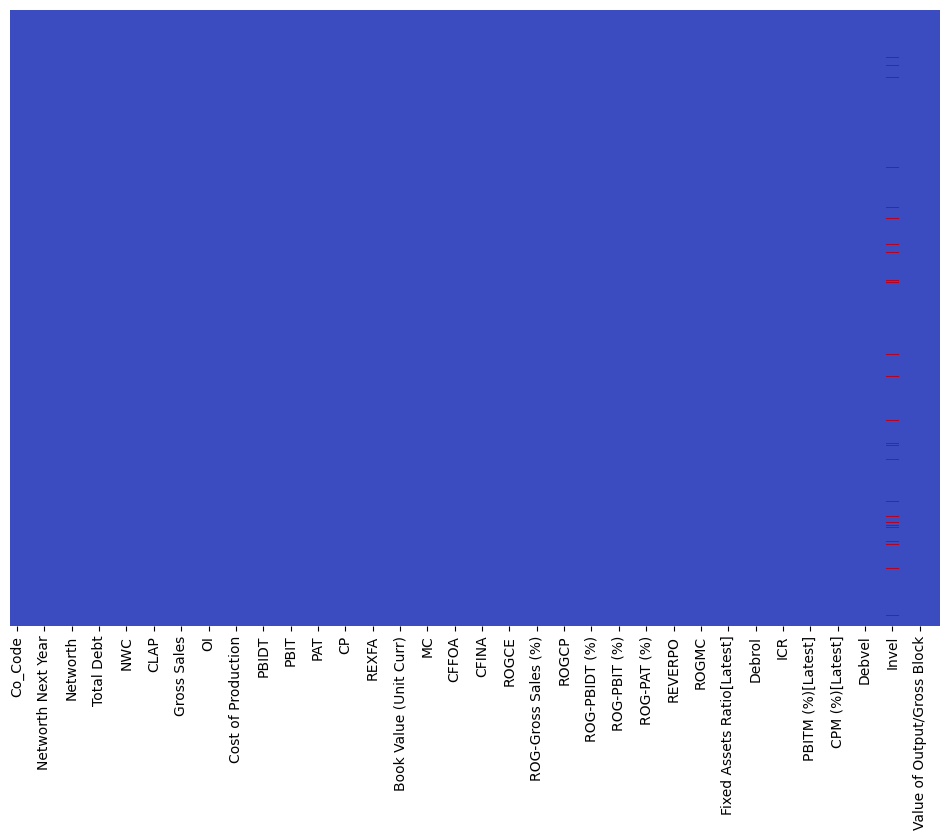

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(fr.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

Median Imputing

replacement with median eliminates impact of outliers in the treatment

In [8]:
fr = fr.drop('Co_Name', 1)
fr = fr.drop('Co_Code', 1)

In [9]:
col=list(fr)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

fr = pd.DataFrame(imputer.fit_transform(fr))
fr.columns=col
fr.head()

,Networth Next Year,EPU,Networth,Capital Employed,Total Debt,Gross Block,NWC,Current Assets,CLAP,Total Assets/Liabilities,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debvel,Credvel,Invel,Value of Output/Total Assets,Value of Output/Gross Block,default
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00,1.0
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24,1.0
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5516.98,-7780.25,-7723.67,-7961.51,97.0,558.0,0.0,-0.03,-0.26,1.0
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90,1.0
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-400.55,-845.88,379.79,274.79,3887.0,346.0,0.0,0.01,0.05,1.0


In [10]:
fr.isnull().sum()

Networth Next Year              0
EPU                             0
Networth                        0
Capital Employed                0
Total Debt                      0
                               ..
Credvel                         0
Invel                           0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
default                         0
Length: 66, dtype: int64

# Outlier detection & Treatment

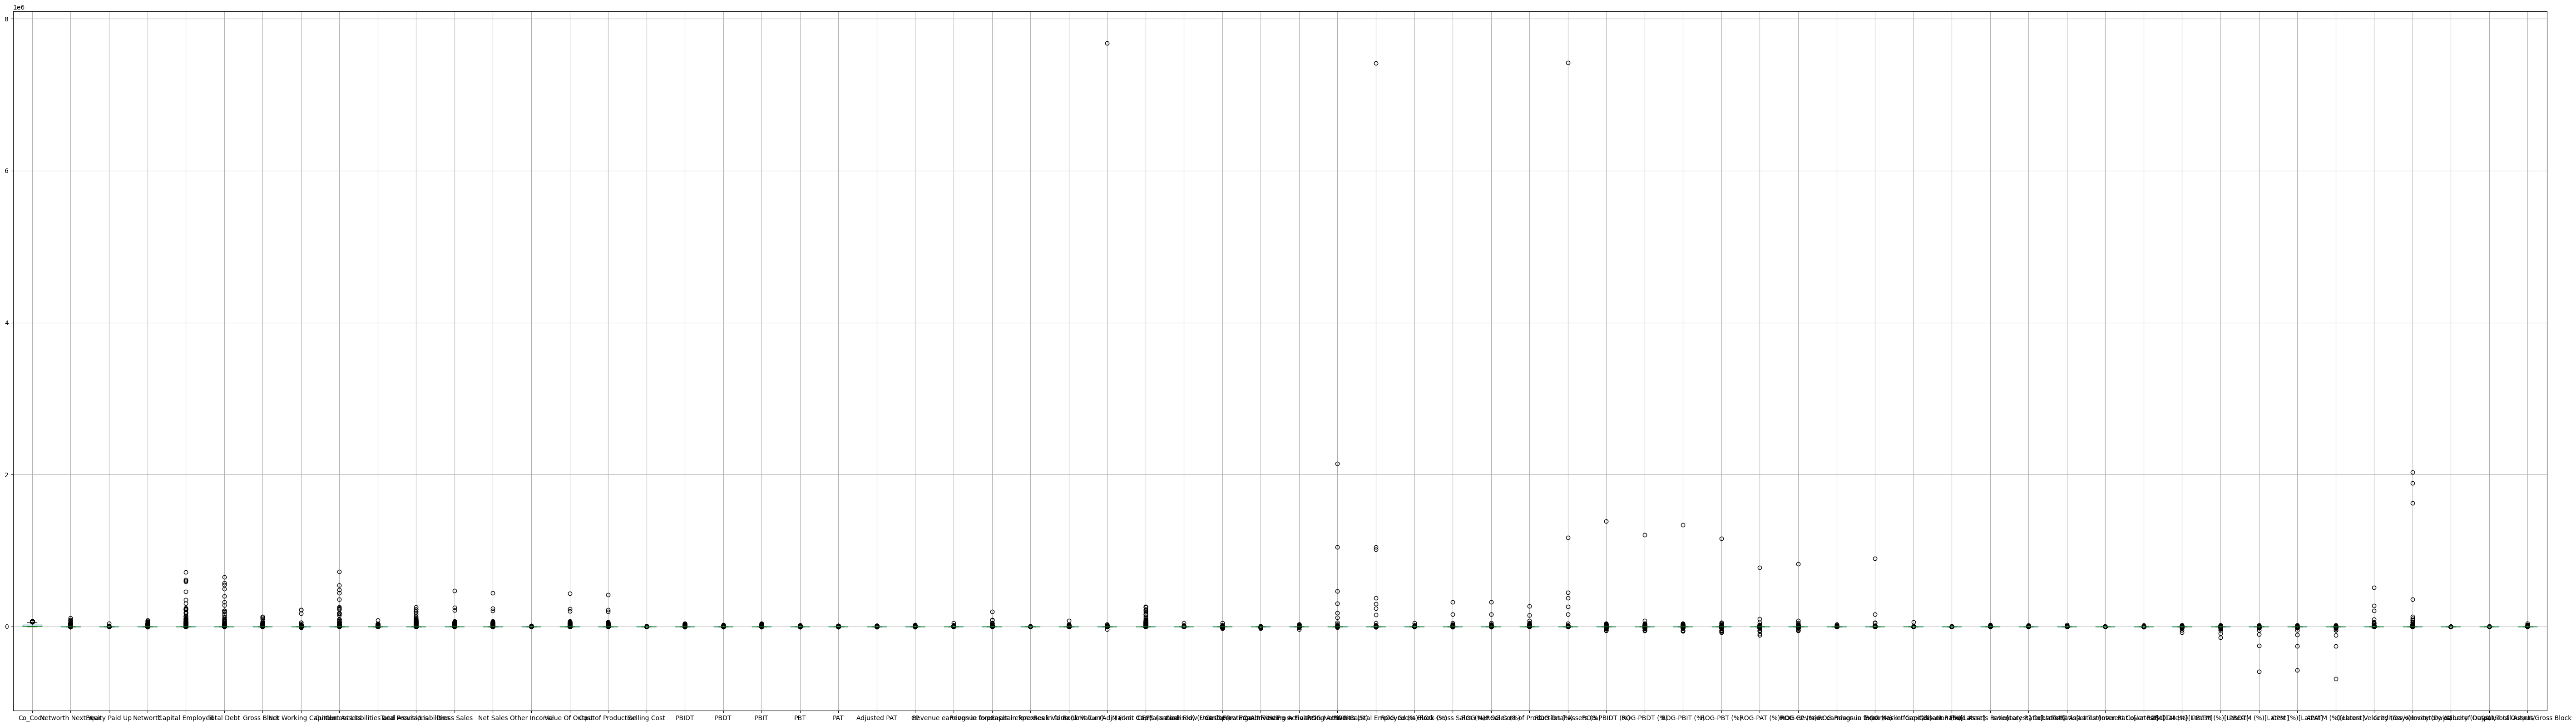

In [14]:
plt.figure(figsize=(72,20))
fr.boxplot()
plt.show()

In [11]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [12]:
for i in fr:
    fr[i]=treat_outlier(fr[i])

-17.445 3.985 123.80250000000001 1978.8225 <built-in function min> <built-in function max>
0.5 3.75 19.5175 131.24 <built-in function min> <built-in function max>
-11.6975 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.6025 226.605 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.6100000000001 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.945 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44 2780.14 <built-in function min> <built-in function max>
0.0 0.02 3.635000000000

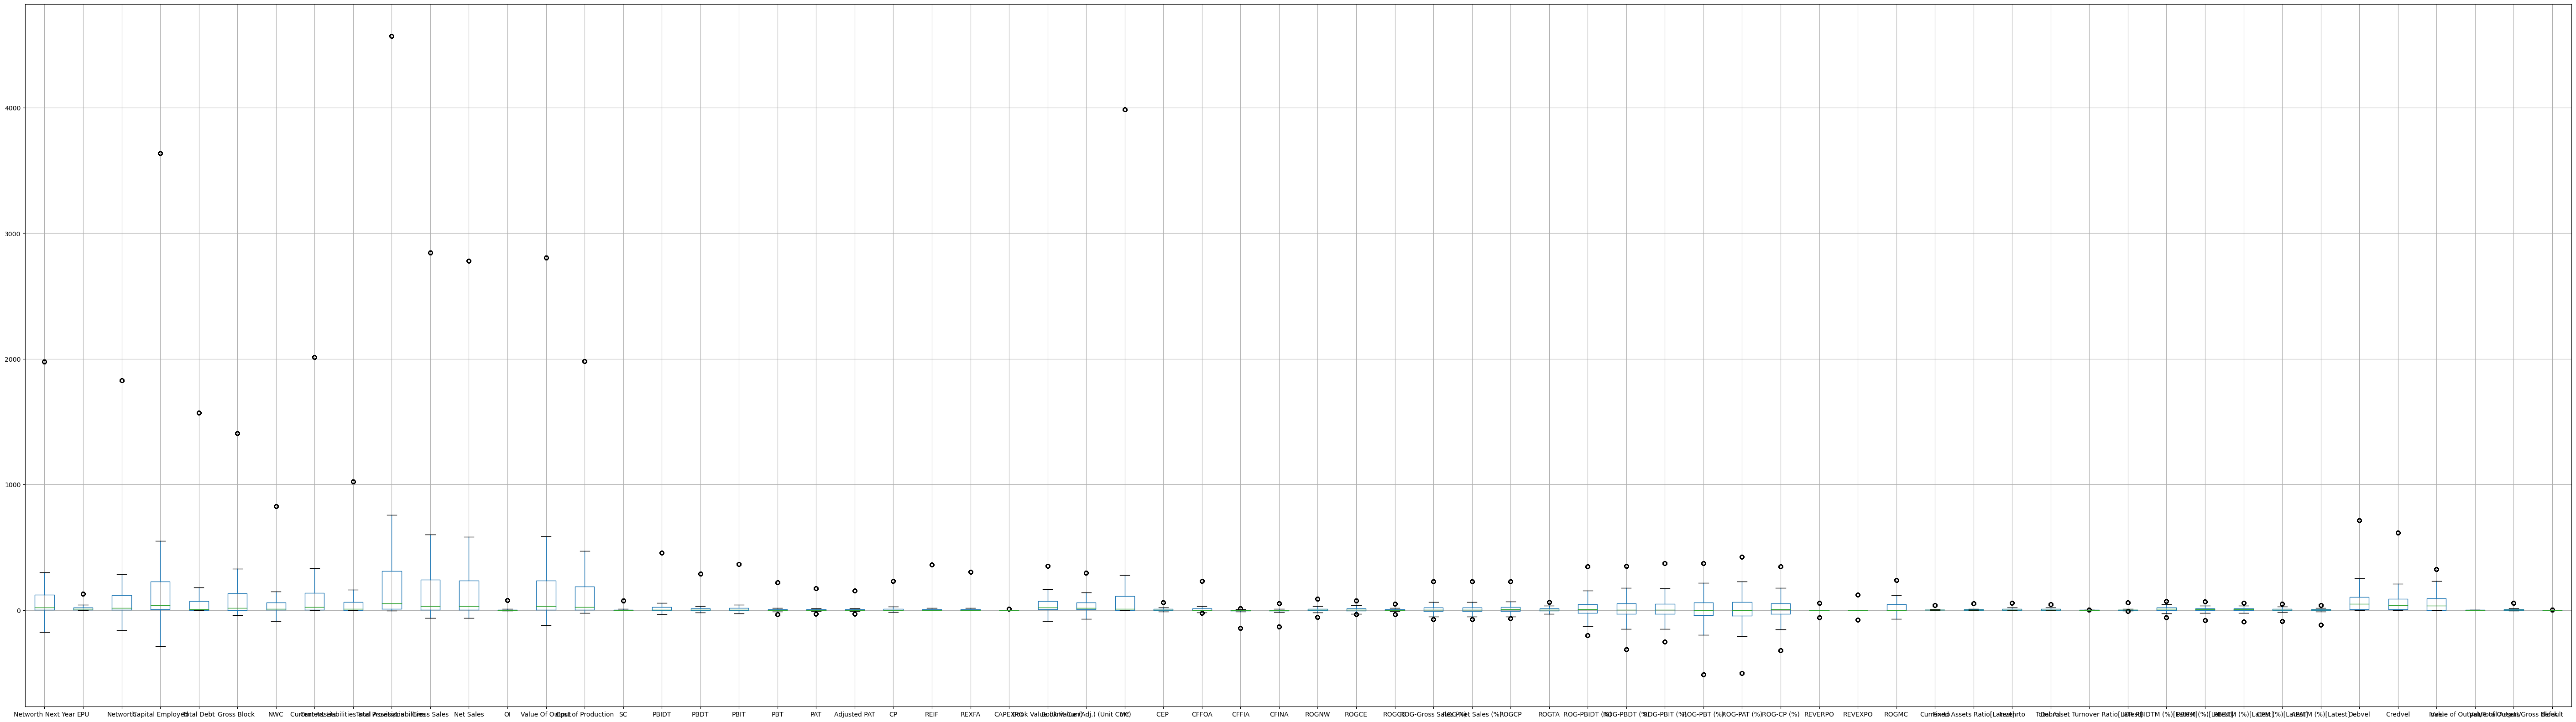

In [66]:
plt.figure(figsize=(72,20))
fr.boxplot()
plt.show()

# Univariate Analysis

# a) Histogram

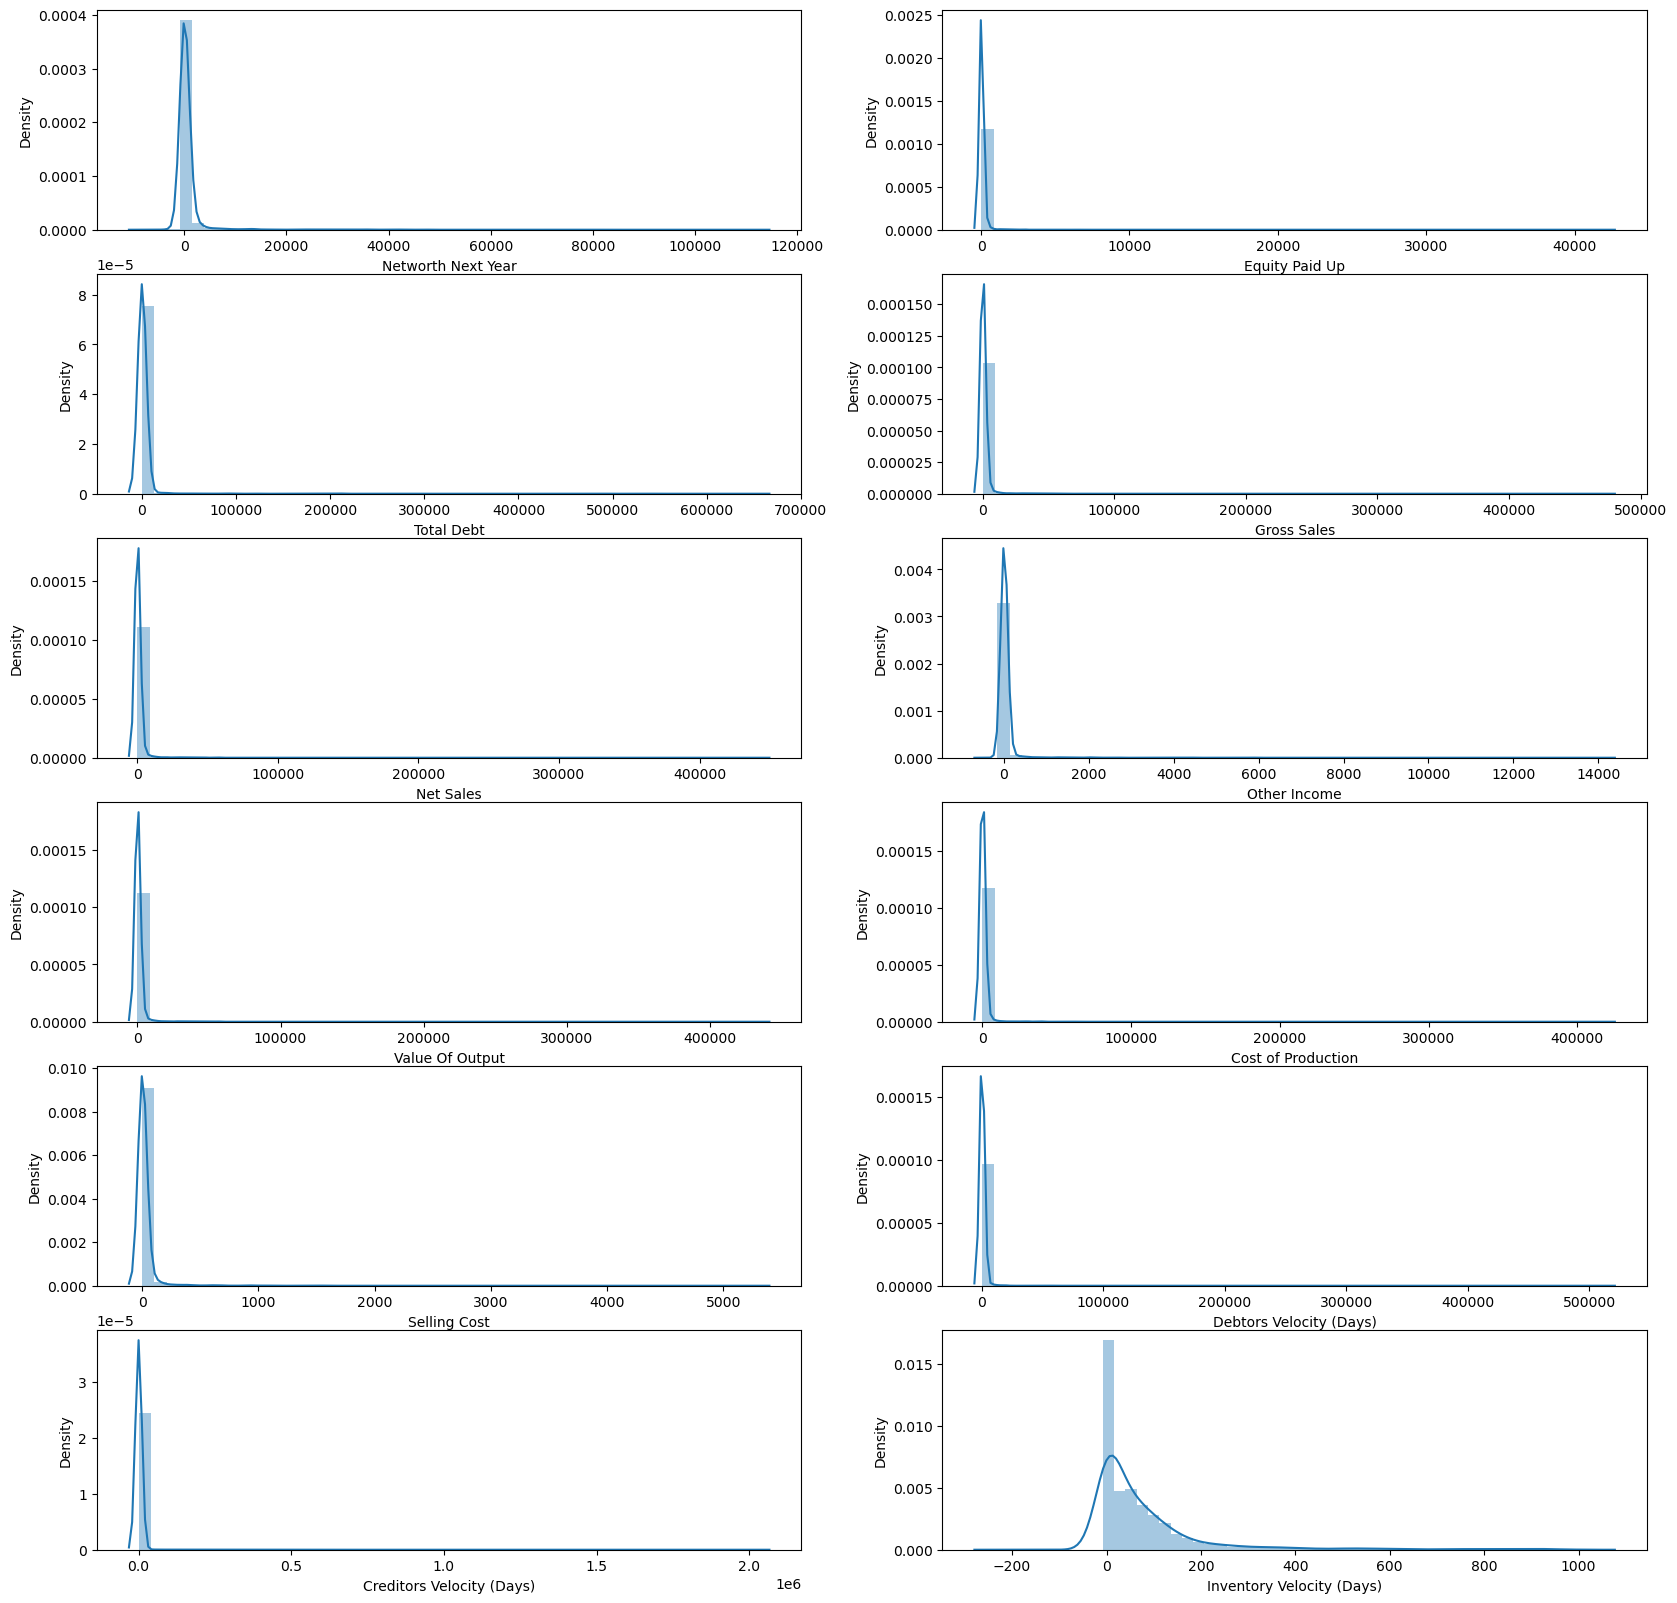

In [16]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20,20)
sns.distplot(fr['Networth Next Year'], kde=True, ax=axes[0][0])
sns.distplot(fr['Equity Paid Up'], kde=True, ax=axes[0][1])
sns.distplot(fr['Total Debt'], kde=True, ax=axes[1][0])
sns.distplot(fr['Gross Sales'], kde=True, ax=axes[1][1])
sns.distplot(fr['Net Sales'], kde=True, ax=axes[2][0])
sns.distplot(fr['Other Income'], kde=True, ax=axes[2][1])
sns.distplot(fr['Value Of Output'], kde=True, ax=axes[3][0])
sns.distplot(fr['Cost of Production'], kde=True, ax=axes[3][1])
sns.distplot(fr['Selling Cost'], kde=True, ax=axes[4][0])
sns.distplot(fr['Debtors Velocity (Days)'], kde=True, ax=axes[4][1])
sns.distplot(fr['Creditors Velocity (Days)'], kde=True, ax=axes[5][0])
sns.distplot(fr['Inventory Velocity (Days)'], kde=True, ax=axes[5][1])
plt.show()

# b) Target variable value count

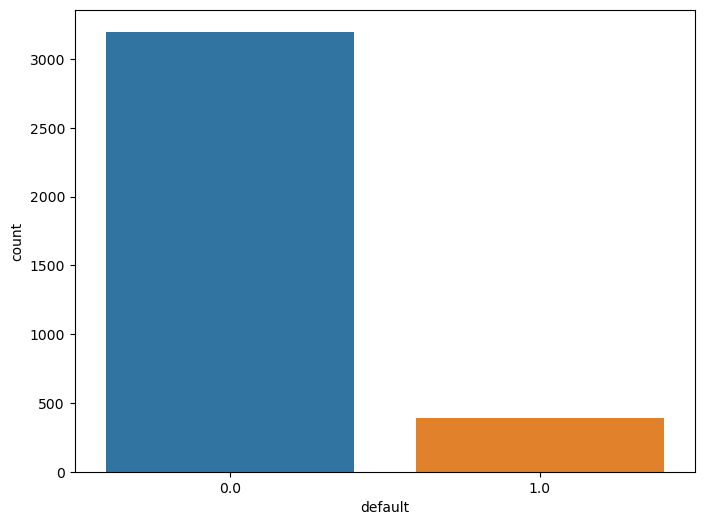

In [67]:
plt.figure(figsize=(8,6))
fr["default"].value_counts()
sns.countplot(fr["default"])
plt.show()

# Bivariate Analysis

# a) Default Status and Net worth

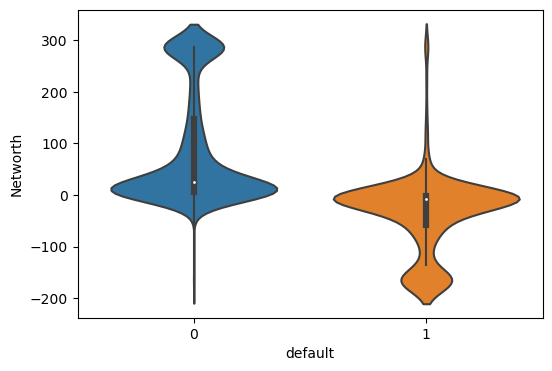

In [25]:
plt.figure(figsize=(6,4))
sns.violinplot(x = fr["default"], 
                  y = def_X["Networth"])
plt.show()

# b) Default Status and Equity Paid Up

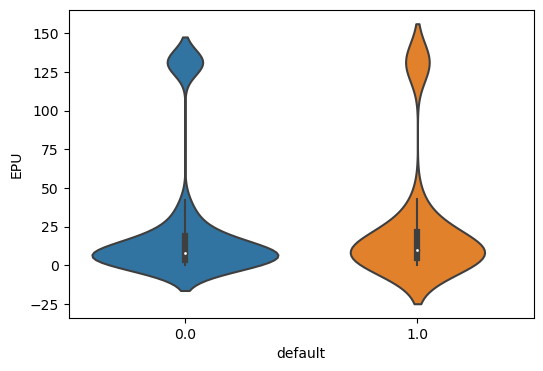

In [71]:
plt.figure(figsize=(6,4))
sns.violinplot(x = fr["default"], 
                  y = fr["EPU"])
plt.show()

# c) Default Status and Capital Employed

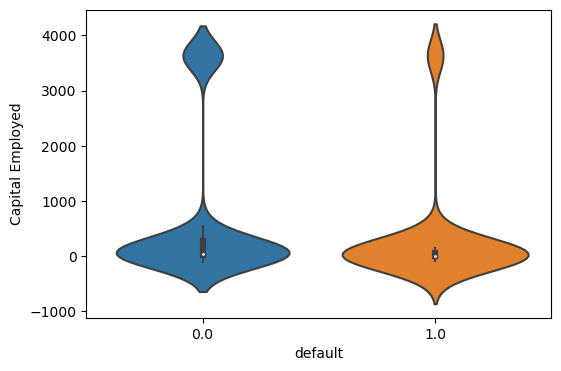

In [72]:
plt.figure(figsize=(6,4))
sns.violinplot(x = fr["default"], 
                  y = fr["Capital Employed"])
plt.show()

# d) Default Status and Total Debt

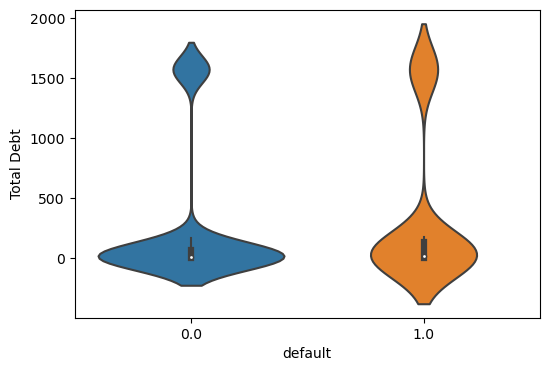

In [76]:
plt.figure(figsize=(6,4))
sns.violinplot(x = fr["default"], 
                  y = fr["Total Debt"])
plt.show()

# e) Default Status and Current Liabilities & Provisions

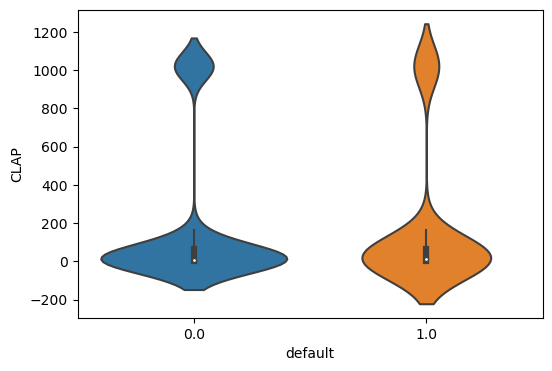

In [12]:
plt.figure(figsize=(6,4))
sns.violinplot(x = fr["default"], 
                  y = fr["CLAP"])
plt.show()

# f) Default Status and Value of Output/Total Assets

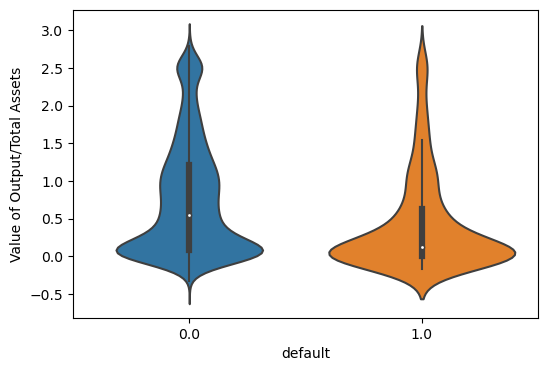

In [13]:
plt.figure(figsize=(6,4))
sns.violinplot(x = fr["default"], 
                  y = fr["Value of Output/Total Assets"])
plt.show()

# Correlation Heatmap

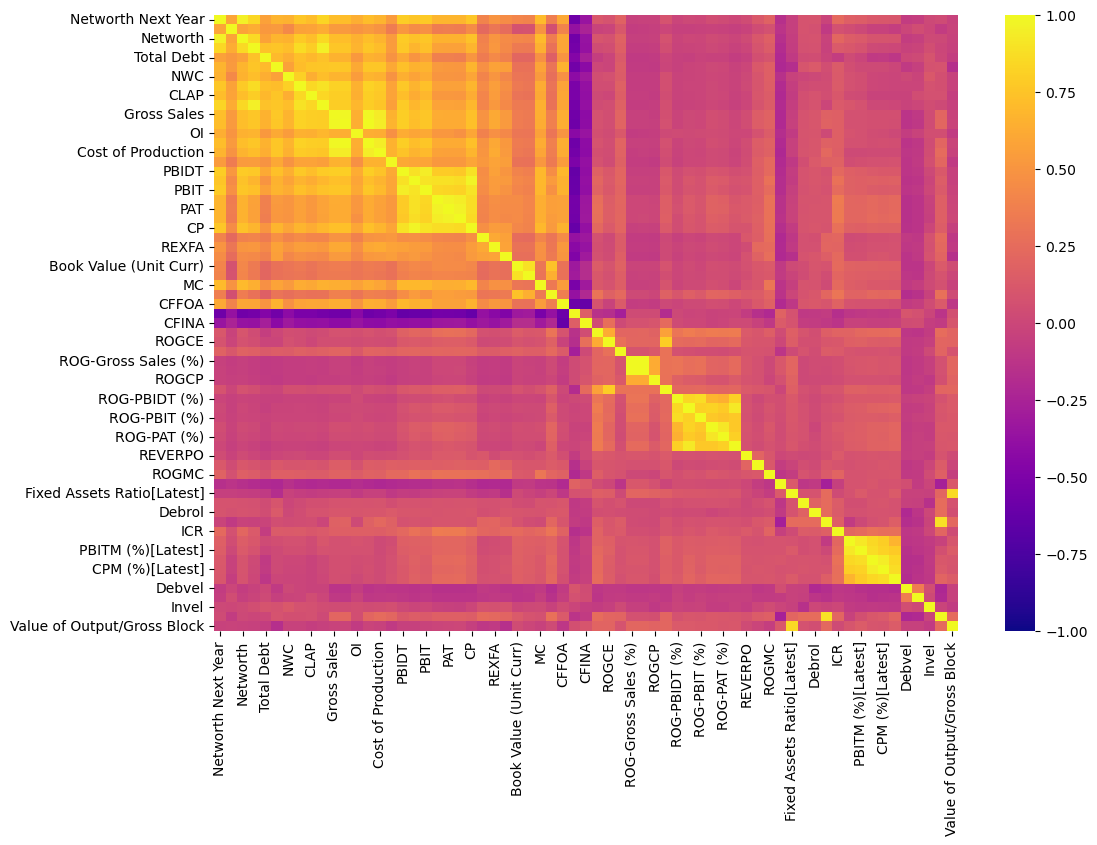

In [17]:
plt.figure(figsize = (12,8))
cor_matrix = fr.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)
plt.show()

# Model Building

In [13]:
def_X = fr.drop(['default','Networth Next Year'], axis=1)
def_Y = fr['default']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(def_X,def_Y,test_size=0.33,random_state=42,stratify=fr['default'])

Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

Company_train.to_csv('Company_train.csv',index=False)
Company_test.to_csv('Company_test.csv',index=False)

In [17]:
X_train.shape

(2402, 64)

In [18]:
X_test.shape

(1184, 64)

In [19]:
y_train.shape

(2402,)

In [20]:
y_test.shape

(1184,)

In [16]:
Company_train.columns

Index(['EPU', 'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'NWC', 'Current Assets ', 'Current Liabilities and Provisions ',
       'Total Assets/Liabilities ', 'Gross Sales', 'Net Sales', 'OI',
       'Value Of Output', 'Cost of Production', 'SC', 'PBIDT', 'PBDT', 'PBIT',
       'PBT', 'PAT', 'Adjusted PAT', 'CP', 'REIF', 'REXFA', 'CAPEXPO',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)', 'MC', 'CEP ',
       'CFFOA', 'CFFIA', 'CFINA', 'ROGNW', 'ROGCE', 'ROGGB',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)', 'ROGCP', 'ROGTA',
       'ROG-PBIDT (%)', 'ROG-PBDT (%)', 'ROG-PBIT (%)', 'ROG-PBT (%)',
       'ROG-PAT (%)', 'ROG-CP (%)', 'REVERPO', 'REVEXPO', 'ROGMC', 'Currenrto',
       'Fixed Assets Ratio[Latest]', 'Invenrto', 'Debrol',
       'Total Asset Turnover Ratio[Latest]', 'ICR', 'PBIDTM (%)[Latest]',
       'PBITM (%)[Latest]', 'PBDTM (%)[Latest]', 'CPM (%)[Latest]',
       'APATM (%)[Latest]', 'Debvel', 'Credvel', 'Invel',
       'Valu

# Model 1

In [15]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [16]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
45,REVERPO,1.124533
46,REVEXPO,1.200701
34,ROGGB,1.297988
48,Currenrto,1.367506
47,ROGMC,1.517616
...,...,...
9,Gross Sales,53.075408
36,ROG-Net Sales (%),120.275129
35,ROG-Gross Sales (%),120.880122
12,Value Of Output,153.181074


In [19]:
ic= pd.DataFrame(calc_vif(X_train).sort_values(by='VIF', ascending = True))

In [20]:
ic.to_csv('vcf.csv')

In [17]:
f_1 = 'default ~ SC + MC + OI + EPU + CFFOA + ROGCE + REXFA + ROGTA + REIF + CFINA + NWC + ROGNW + CFFIA + ICR + CAPEXPO + Debvel + Currenrto + Invenrto + Credvel + ROGCP + Debrol + Invel + ROGMC + ROGGB + REVERPO + REVEXPO'

# Fitting the model

In [18]:
import statsmodels.formula.api as SM

In [19]:
model_1 = SM.logit(formula = f_1, data=fr).fit()

Optimization terminated successfully.
         Current function value: 0.245169
         Iterations 8


In [20]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3559
Method:                           MLE   Df Model:                           26
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.2847
Time:                        15:45:55   Log-Likelihood:                -879.18
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                8.279e-131
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4628      0.117    -12.463      0.000      -1.693      -1.233
SC             0.0022      0.004      0.547      0.584      -0.006       0.010
MC            -0.0004   9.58e-05     -4.279      0.000      -0.001      -0.000
OI             0.0035      0.003      1.051      0.293      -0.003       0.010
EPU            0.0074      0.002      3.804      0.000       0.004       0.011
CFFOA      -6.823e-05      0.002     -0.044      0.965      -0.003       0.003
ROGCE          0.0005      0.004      0.107      0.915      -0.008       0.009
REXFA          0.0007      0.001      0.867      0.386      -0.001       0.002
ROGTA         -0.0081      0.005     -1.620      0.105      -0.018       0.002
REIF          -0.0011      0.001     -1.560      0.119      -0.002       0.000
CFINA          0.0015      0.002      0.751      0.453      -0.002       0.005
NWC           -0.0011      0.000     -3.094      0.002      -0.002      -0.000
ROGNW         -0.0268      0.003    -10.266      0.000      -0.032      -0.022
CFFIA          0.0050      0.002      2.194      0.028       0.001       0.010
ICR           -0.0315      0.007     -4.370      0.000      -0.046      -0.017
CAPEXPO       -0.0150      0.022     -0.669      0.504      -0.059       0.029
Debvel        -0.0011      0.000     -3.894      0.000      -0.002      -0.001
Currenrto     -0.0730      0.011     -6.760      0.000      -0.094      -0.052
Invenrto      -0.0076      0.004     -1.737      0.082      -0.016       0.001
Credvel        0.0016      0.000      5.471      0.000       0.001       0.002
ROGCP         -0.0020      0.001     -2.181      0.029      -0.004      -0.000
Debrol        -0.0133      0.006     -2.351      0.019      -0.024      -0.002
Invel         -0.0011      0.001     -1.607      0.108      -0.003       0.000
ROGMC         -0.0008      0.001     -0.882      0.378      -0.003       0.001
ROGGB         -0.0091      0.004     -2.454      0.014      -0.016      -0.002
REVERPO       -0.0010      0.002     -0.474      0.635      -0.005       0.003
REVEXPO       -0.0020      0.001     -1.841      0.066      -0.004       0.000
==============================================================================
"""

In [21]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.26350930996018607


# Model 2

In [22]:
calc_vif(X_train[['MC','EPU','NWC','ROGNW','CFFIA','ICR','Debvel','Currenrto','Credvel','ROGCP','Debrol','ROGGB']]).sort_values(by='VIF', ascending = True)

,variables,VIF
9,ROGCP,1.130038
7,Currenrto,1.161832
3,ROGNW,1.182723
11,ROGGB,1.196323
10,Debrol,1.256705
5,ICR,1.316280
8,Credvel,1.464526
6,Debvel,1.501972
1,EPU,1.877767
4,CFFIA,1.897368


In [23]:
f_2 = 'default ~ MC + EPU + NWC + ROGNW + CFFIA + ICR + Debvel + Currenrto + Credvel + ROGCP + Debrol + ROGGB'

In [24]:
model_2 = SM.logit(formula = f_2, data=fr).fit()

Optimization terminated successfully.
         Current function value: 0.248265
         Iterations 8


In [25]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3573
Method:                           MLE   Df Model:                           12
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.2756
Time:                        15:46:11   Log-Likelihood:                -890.28
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                2.852e-137
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6474      0.104    -15.853      0.000      -1.851      -1.444
MC            -0.0004   8.97e-05     -4.488      0.000      -0.001      -0.000
EPU            0.0079      0.002      4.216      0.000       0.004       0.012
NWC           -0.0012      0.000     -3.471      0.001      -0.002      -0.001
ROGNW         -0.0289      0.002    -12.590      0.000      -0.033      -0.024
CFFIA          0.0055      0.002      2.795      0.005       0.002       0.009
ICR           -0.0336      0.007     -4.606      0.000      -0.048      -0.019
Debvel        -0.0012      0.000     -3.930      0.000      -0.002      -0.001
Currenrto     -0.0705      0.011     -6.556      0.000      -0.092      -0.049
Credvel        0.0016      0.000      5.809      0.000       0.001       0.002
ROGCP         -0.0021      0.001     -2.329      0.020      -0.004      -0.000
Debrol        -0.0163      0.006     -2.893      0.004      -0.027      -0.005
ROGGB         -0.0113      0.004     -3.125      0.002      -0.018      -0.004
==============================================================================
"""

In [32]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.26586628447971494


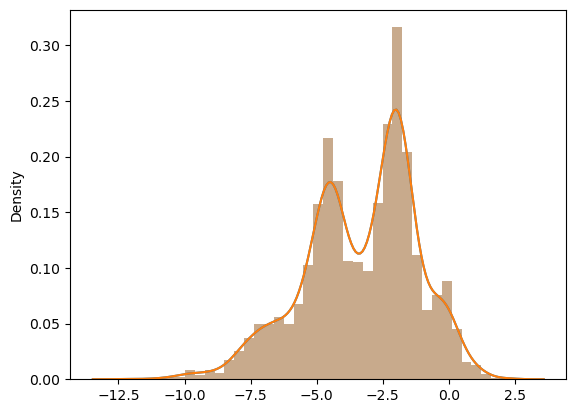

In [39]:
sns.distplot(model_2.fittedvalues);
plt.show()

In [28]:
y_predict_train = model_2.predict(X_train)
y_predict_train

842     0.011858
1057    0.000459
1595    0.005550
100     0.399122
1191    0.081499
          ...   
1815    0.028684
2852    0.219095
1505    0.000971
375     0.532902
3428    0.010308
Length: 2402, dtype: float64

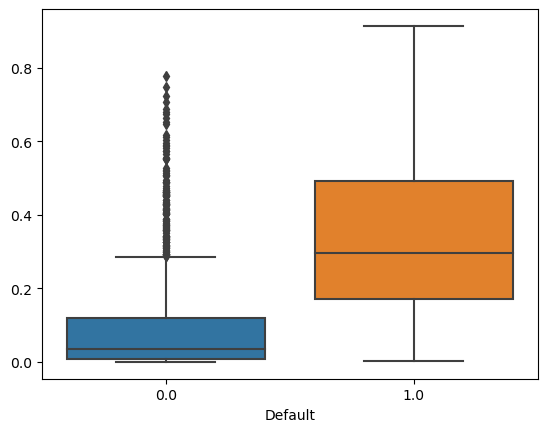

In [29]:
sns.boxplot(x=fr['default'],y=y_predict_train)
plt.xlabel('Default');
plt.show()

# Cut off 1

In [47]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

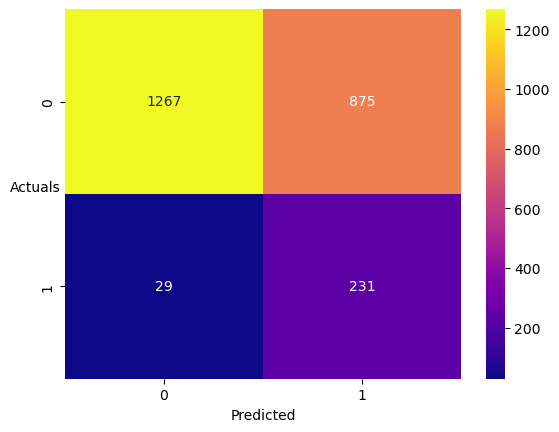

In [48]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show()

In [47]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1267 
False Positives: 875 
False Negatives: 29 
True Positives: 231


In [49]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.978     0.592     0.737      2142
         1.0      0.209     0.888     0.338       260

    accuracy                          0.624      2402
   macro avg      0.593     0.740     0.538      2402
weighted avg      0.894     0.624     0.694      2402



In [49]:
y_predict_test = model_2.predict(X_test)
y_predict_test

251     0.364866
3493    0.016439
3063    0.202619
2384    0.172924
1679    0.003259
          ...   
1321    0.082288
2666    0.011349
773     0.005578
3488    0.000666
2956    0.026597
Length: 1184, dtype: float64

In [50]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

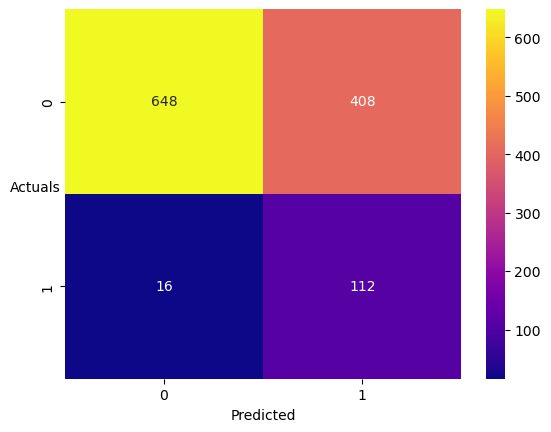

In [53]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show()

In [54]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.976     0.614     0.753      1056
         1.0      0.215     0.875     0.346       128

    accuracy                          0.642      1184
   macro avg      0.596     0.744     0.550      1184
weighted avg      0.894     0.642     0.709      1184



# Cut off 2

In [55]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

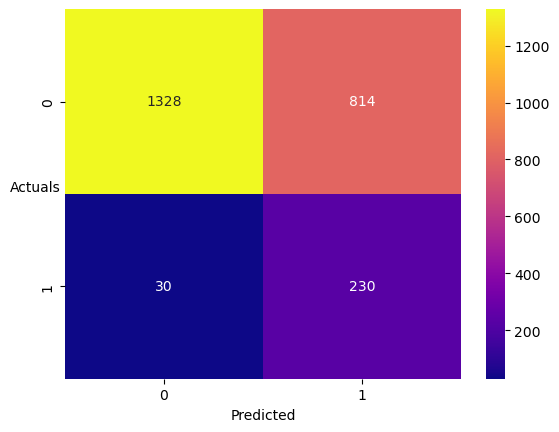

In [58]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show()

In [59]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.978     0.620     0.759      2142
         1.0      0.220     0.885     0.353       260

    accuracy                          0.649      2402
   macro avg      0.599     0.752     0.556      2402
weighted avg      0.896     0.649     0.715      2402



In [60]:
y_predict_test = model_2.predict(X_test)
y_predict_test

251     0.364866
3493    0.016439
3063    0.202619
2384    0.172924
1679    0.003259
          ...   
1321    0.082288
2666    0.011349
773     0.005578
3488    0.000666
2956    0.026597
Length: 1184, dtype: float64

In [61]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

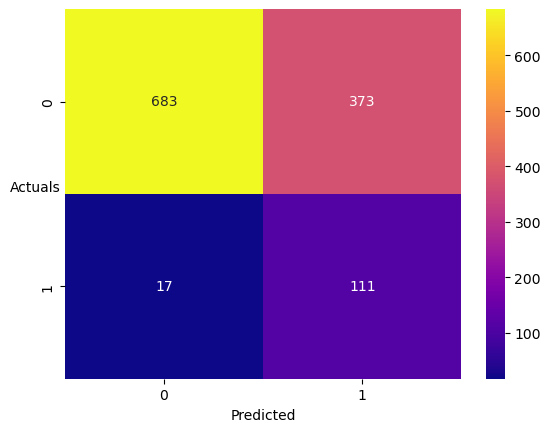

In [64]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.show()

In [65]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.976     0.647     0.778      1056
         1.0      0.229     0.867     0.363       128

    accuracy                          0.671      1184
   macro avg      0.603     0.757     0.570      1184
weighted avg      0.895     0.671     0.733      1184



# Interprettations

The important interprettations from the model are:

	Non default companies have a higher net worth than default companies. 

	Equity paid up and capital employed is almost same for default and non-default companies.

	Market capitalization, Equity Paid Up, Rate of Growth Net worth, Debtors Velocity, creditors Velocity etc.… are the most important variables in determining the default status of a company.